In [1]:
#import required packages
import itertools
import numpy as np
import pyvista as pv
import geopandas as gpd
#for windows users
from shapely import speedups
speedups.disable()


C:\Users\saulm\AppData\Local\Temp\ipykernel_8980\3034531366.py:8: DeprecationWarning: This function has no longer any effect, and will be removed in a future release. Starting with Shapely 2.0, equivalent speedups are always available
  speedups.disable()


In [2]:

#create geodataframes from all shapefiles
pitDf = gpd.read_file('../shp/pitElevContours.shp')
tailingsDf = gpd.read_file('../shp/tailingsEnvelope.shp')
dumpDf = gpd.read_file('../shp/wasteDump.shp')

c:\Users\saulm\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


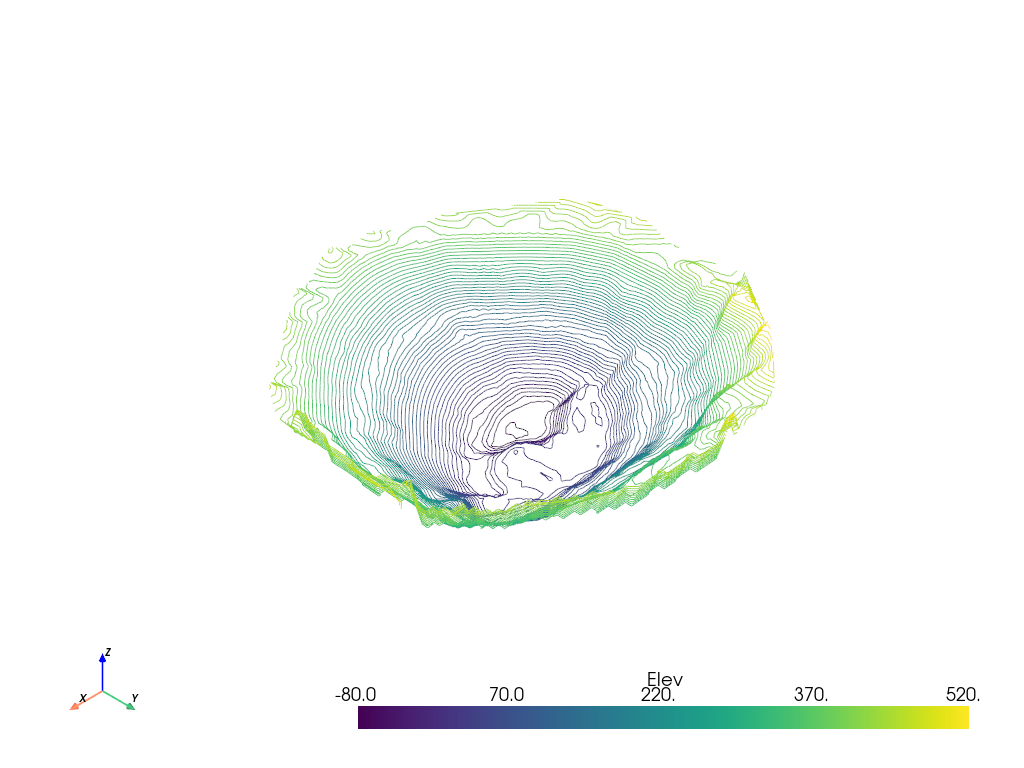

In [5]:
#create emtpy dict to store the partial unstructure grids
lineTubes = {}

#iterate over the points
for index, values in pitDf.iterrows():
    cellSec = []
    linePointSec = []

    #iterate over the geometry coords
    zipObject = zip(values.geometry.xy[0],values.geometry.xy[1],itertools.repeat(values.ELEV))
    for linePoint in zipObject:
        linePointSec.append([linePoint[0],linePoint[1],linePoint[2]])

    #get the number of vertex from the line and create the cell sequence
    nPoints = len(list(pitDf.loc[index].geometry.coords))
    cellSec = [nPoints] + [i for i in range(nPoints)]

    #convert list to numpy arrays
    cellSecArray = np.array(cellSec)
    cellTypeArray = np.array([4])
    linePointArray = np.array(linePointSec)

    partialLineUgrid = pv.UnstructuredGrid(cellSecArray,cellTypeArray,linePointArray)   
    #we can add some values to the point
    partialLineUgrid.cell_data["Elev"] = values.ELEV
    lineTubes[str(index)] = partialLineUgrid

#merge all tubes and export resulting vtk
lineBlocks = pv.MultiBlock(lineTubes)
lineGrid = lineBlocks.combine()
lineGrid.save('../vtk/pitLine.vtk',binary=False)
lineGrid.plot()

c:\Users\saulm\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


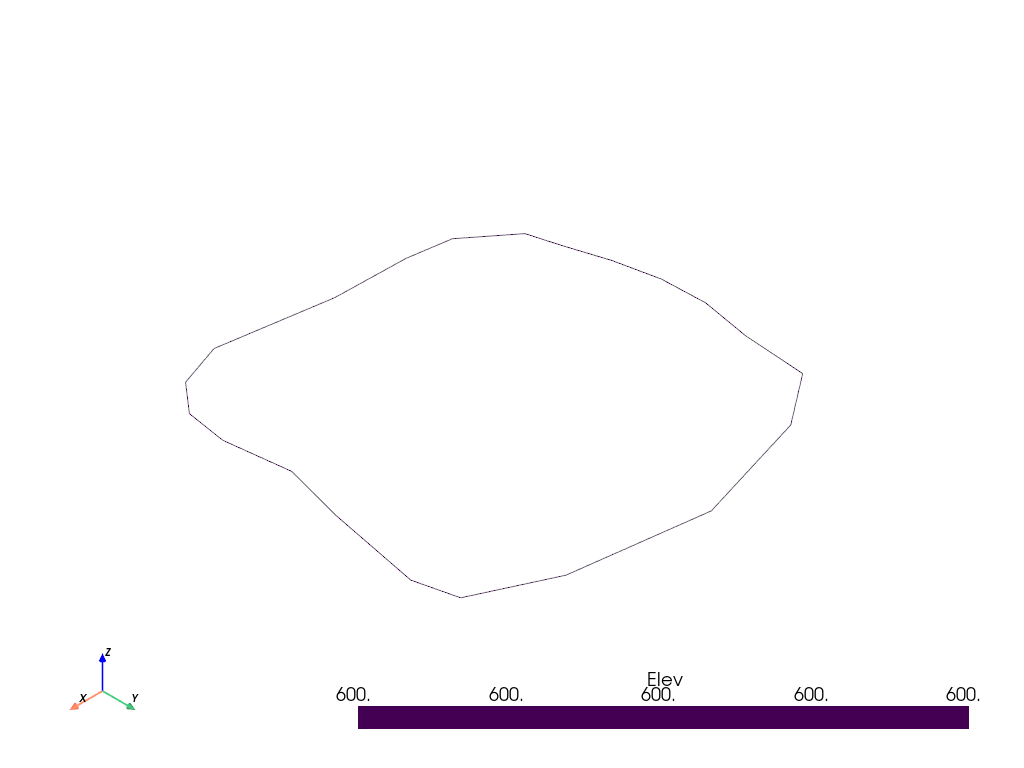

In [9]:
#create emtpy dict to store the partial unstructure grids
polyTubes = {}

#iterate over the points
for index, values in dumpDf.iterrows():
    cellSec = []
    linePointSec = []

    #iterate over the geometry coords
    zipObject = zip(values.geometry.exterior.xy[0],
                    values.geometry.exterior.xy[1],
                    itertools.repeat(600)) #itertools.repeat(values.Elev))
    for linePoint in zipObject:
        linePointSec.append([linePoint[0],linePoint[1],linePoint[2]])

    #get the number of vertex from the line and create the cell sequence
    nPoints = len(list(dumpDf.loc[index].geometry.exterior.coords))
    cellSec = [nPoints] + [i for i in range(nPoints)]

    #convert list to numpy arrays
    cellSecArray = np.array(cellSec)
    cellTypeArray = np.array([4])
    linePointArray = np.array(linePointSec)

    partialPolyUgrid = pv.UnstructuredGrid(cellSecArray,cellTypeArray,linePointArray)   
    #we can add some values to the point
    partialPolyUgrid.cell_data["Elev"] = 600 #values.ELEV
    #    partialPolyUgrid.save('../vtk/partiallakePoly.vtk',binary=False)
    polyTubes[str(index)] = partialPolyUgrid

#merge all tubes and export resulting vtk
polyBlocks = pv.MultiBlock(polyTubes)
polyGrid = polyBlocks.combine()
polyGrid.save('../vtk/dumpPoly.vtk',binary=False)
polyGrid.plot()

c:\Users\saulm\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


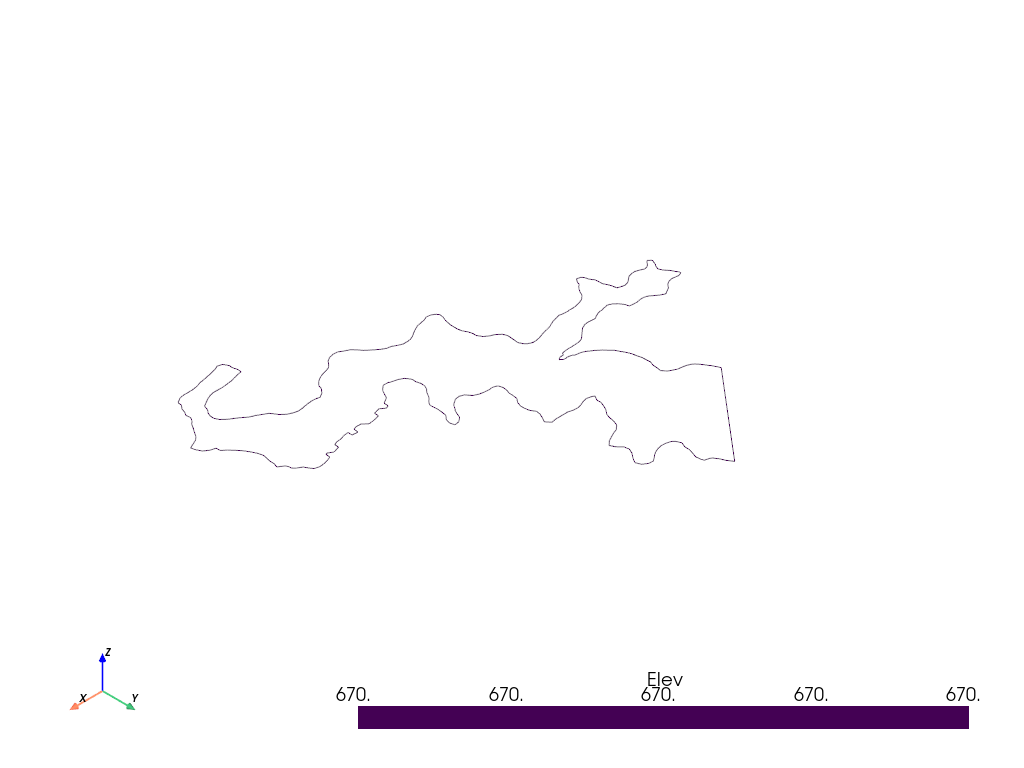

In [10]:
#create emtpy dict to store the partial unstructure grids
polyTubes = {}

#iterate over the points
for index, values in tailingsDf.iterrows():
    cellSec = []
    linePointSec = []

    #iterate over the geometry coords
    zipObject = zip(values.geometry.exterior.xy[0],
                    values.geometry.exterior.xy[1],
                    itertools.repeat(670)) #itertools.repeat(values.Elev))
    for linePoint in zipObject:
        linePointSec.append([linePoint[0],linePoint[1],linePoint[2]])

    #get the number of vertex from the line and create the cell sequence
    nPoints = len(list(tailingsDf.loc[index].geometry.exterior.coords))
    cellSec = [nPoints] + [i for i in range(nPoints)]

    #convert list to numpy arrays
    cellSecArray = np.array(cellSec)
    cellTypeArray = np.array([4])
    linePointArray = np.array(linePointSec)

    partialPolyUgrid = pv.UnstructuredGrid(cellSecArray,cellTypeArray,linePointArray)   
    #we can add some values to the point
    partialPolyUgrid.cell_data["Elev"] = 670 #values.ELEV
    #    partialPolyUgrid.save('../vtk/partiallakePoly.vtk',binary=False)
    polyTubes[str(index)] = partialPolyUgrid

#merge all tubes and export resulting vtk
polyBlocks = pv.MultiBlock(polyTubes)
polyGrid = polyBlocks.combine()
polyGrid.save('../vtk/tailingsPoly.vtk',binary=False)
polyGrid.plot()